In [117]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from cholesky import Cholesky
from imutils import img2array, array2img, load_coords
from interpolation import affine_grid_generator, bilinear_sampler

plt.rcParams['figure.figsize'] = (15.0, 8.0)

In [110]:
x, y = load_coords('coords.p')

# homogenize coordinates
y = np.append(y, np.ones((y.shape[0], 1)), axis=1)

In [111]:
x

array([[ 268.84050179,  420.57526882],
       [ 311.42114695,  437.92293907],
       [ 284.61111111,  537.27777778],
       [ 286.18817204,  516.77598566],
       [ 653.64336918,  535.70071685],
       [ 180.52508961,  307.02688172]])

In [112]:
y

array([[ 418.66129032,  528.24551971,    1.        ],
       [ 436.00896057,  487.24193548,    1.        ],
       [ 533.78673835,  512.47491039,    1.        ],
       [ 516.4390681 ,  512.47491039,    1.        ],
       [ 535.36379928,  149.75089606,    1.        ],
       [ 303.53584229,  618.13799283,    1.        ]])

In [113]:
num_pts = y.shape[0]
P = []
for i in range(num_pts):
    P.append(np.hstack([y[i], np.zeros(3).T]))
    P.append(np.hstack([np.zeros(3).T, y[i]]))
P = np.array(P)
Q = x.flatten()

In [114]:
P

array([[ 418.66129032,  528.24551971,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  418.66129032,
         528.24551971,    1.        ],
       [ 436.00896057,  487.24193548,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  436.00896057,
         487.24193548,    1.        ],
       [ 533.78673835,  512.47491039,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  533.78673835,
         512.47491039,    1.        ],
       [ 516.4390681 ,  512.47491039,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,  516.4390681 ,
         512.47491039,    1.        ],
       [ 535.36379928,  149.75089606,    1.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,

In [124]:
M = Cholesky(np.dot(P.T, P)).solve(np.dot(P.T, Q))

In [116]:
M = M.reshape(2, 3)
M

array([[ -9.89138641e-03,  -1.01603004e+00,   8.10952181e+02],
       [  9.96602012e-01,   4.45444461e-03,   1.38295382e+00]])

In [96]:
cat_dir = './imgs/'
filepath = os.path.join(cat_dir, 'crooked_cat.png')
img = img2array(filepath, desired_size=(800, 800))

In [118]:
height = 800
width = 800

In [119]:
affine_grid = affine_grid_generator(800, 800, M)

Transformation Matrix: (2, 3)
Sampling Grid: (3, 640000)
Affine Grid: (2, 800, 800)


In [120]:
x_s = affine_grid[0:1, :].squeeze()
y_s = affine_grid[1:2, :].squeeze()

In [121]:
out = bilinear_sampler(img, x_s, y_s)

In [122]:
out = np.clip(out, 0, 1)

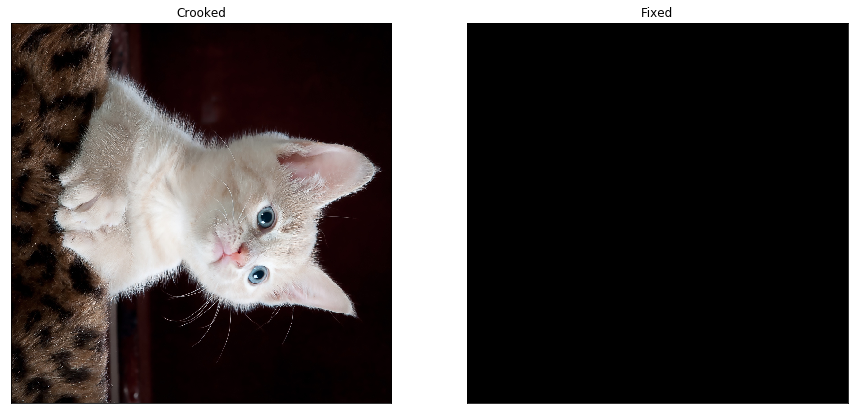

In [123]:
fig, ax = plt.subplots(nrows=1, ncols=2)


ax[0].imshow(img)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("Crooked")
ax[1].imshow(out)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("Fixed")

plt.show()